# Trabajo práctico: Predicción de precios de casas

Alumnos: Noir Nicolas, González Ignacio

Año: 2024

Materia: Aprendizaje automático 1

Carrera: TUIA

## Descripcion de variables

Características de entrada en orden:

1) CRIM: tasa de criminalidad per cápita por ciudad
2) ZN: proporción de terrenos residenciales zonificados para lotes de más de 25,000 pies cuadrados
3) INDUS: proporción de acres de negocios no minoristas por ciudad
4) CHAS: variable dummy del río Charles (1 si el tramo limita con el río; 0 de lo contrario)
5) NOX: concentración de óxidos de nitrógeno (partes por 10 millones) [parts/10M]
6) RM: número promedio de habitaciones por vivienda
7) AGE: proporción de unidades ocupadas por sus propietarios construidas antes de 1940
8) DIS: distancias ponderadas a cinco centros de empleo de Boston
9) RAD: índice de accesibilidad a las autopistas radiales
10) TAX: tasa de impuesto sobre la propiedad a valor completo por $10,000 [$/10k]
11) PTRATIO: proporción alumno-maestro por ciudad
12) B: El resultado de la ecuación B=1000(Bk - 0.63)^2 donde Bk es la proporción de negros por ciudad
13) LSTAT: % de población de menor estatus socioeconómico

Variable de salida (target):

14) MEDV: Valor mediano de las viviendas ocupadas por sus propietarios en miles de dólares [k$]


## Librerias

Descarga e instalación de librerias

In [2]:
# !pip install scikit-learn
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn
# !pip install plotly
# !pip install nbformat

Importación de librerias

In [3]:
import pandas as pd
from sklearn.impute import KNNImputer
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
import plotly.figure_factory as ff
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.exceptions import DataConversionWarning
from sklearn import metrics
from sklearn.exceptions import ConvergenceWarning

# Libreria necesaria para poder ocultar errores que empeoran la visualización del notebook
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DataConversionWarning)
warnings.simplefilter(action='ignore', category=ConvergenceWarning)

## 3. Análisis descriptivo.

### Preprocesamiento de los datos

In [4]:
# Carga del dataset desde github para una agilización de el cargado de archivos.
# Descarte de los registros en donde la variable de salida es nula o vacía.
dataset_completo = pd.read_csv("https://github.com/nacho-gonz/AA1-Archivos-2024/raw/master/house-prices-tp.csv")
dataset_completo.dropna(subset=['MEDV'],inplace=True)
X_train, X_test, y_train, y_test = train_test_split(dataset_completo.drop('MEDV', axis=1), dataset_completo['MEDV'].values.reshape(-1,1), test_size=0.2,random_state=42)

In [5]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((428, 13), (107, 13), (428, 1), (107, 1))

In [6]:
# Observación sobre los tipos de datos y la cantidad de datos faltantes.
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 428 entries, 290 to 106
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     420 non-null    float64
 1   ZN       419 non-null    float64
 2   INDUS    425 non-null    float64
 3   CHAS     420 non-null    float64
 4   NOX      419 non-null    float64
 5   RM       421 non-null    float64
 6   AGE      421 non-null    float64
 7   DIS      425 non-null    float64
 8   RAD      419 non-null    float64
 9   TAX      421 non-null    float64
 10  PTRATIO  423 non-null    float64
 11  B        421 non-null    float64
 12  LSTAT    421 non-null    float64
dtypes: float64(13)
memory usage: 46.8 KB


In [8]:
# Chequeo de que si en verdad todas las variables son de tipo float.
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
290,0.178990,0.000000,9.690000,0.0,0.585,5.670000,28.800000,2.798600,6.0,391.0,19.200000,393.290000,17.600000
357,0.047410,0.000000,11.930000,0.0,0.573,6.030000,80.800000,2.505000,1.0,273.0,21.000000,396.900000,7.880000
458,12.510504,11.610423,14.404205,0.0,NaN,7.949105,95.592034,1.263211,NaN,NaN,12.865192,284.787493,27.789443
438,0.110270,25.000000,5.130000,0.0,0.453,6.456000,67.800000,7.225500,8.0,284.0,19.700000,396.900000,6.730000
153,14.420800,0.000000,18.100000,0.0,0.740,6.461000,93.300000,2.002600,24.0,666.0,20.200000,27.490000,18.050000


In [20]:
# Elijo imputar los valores con KNN, ya que estima de una manera más real el valor que podrían 
# tener esos registros. En el caso de 'CHAS' creo que aunque esta manera de imputar valores no funciona
# que no son 0 o 1, al redondear va a seguir siendo más certero que cualquier metodo de imputación de valores.
knn_imputer = KNNImputer(n_neighbors=5).set_output(transform='pandas')
X_train_imputado_df = knn_imputer.fit_transform(X_train)
X_train_imputado_df['RAD'] = X_train_imputado_df['RAD'].round().astype('int')
X_train_imputado_df['CHAS'] = X_train_imputado_df['CHAS'].round().astype('category')
X_train_imputado_df.info()
y_train_df = pd.DataFrame(y_train,columns=['MEDV'])
x_test_imputado = knn_imputer.transform(X_test)

<class 'pandas.core.frame.DataFrame'>
Index: 428 entries, 290 to 106
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     428 non-null    float64 
 1   ZN       428 non-null    float64 
 2   INDUS    428 non-null    float64 
 3   CHAS     428 non-null    category
 4   NOX      428 non-null    float64 
 5   RM       428 non-null    float64 
 6   AGE      428 non-null    float64 
 7   DIS      428 non-null    float64 
 8   RAD      428 non-null    int64   
 9   TAX      428 non-null    float64 
 10  PTRATIO  428 non-null    float64 
 11  B        428 non-null    float64 
 12  LSTAT    428 non-null    float64 
dtypes: category(1), float64(11), int64(1)
memory usage: 44.0 KB


### Visualización de los datos

In [17]:
fig = px.scatter(x=X_train_imputado_df['AGE'], y=X_train_imputado_df['DIS'], 
                title='Comparación entre la cercania a centros de empleo y la proporción de casas antiguas'
                , labels={'x':'Proporción de casas ocupadas por sus propietarios construidas antes de 1940',
                            'y':'Distancias ponderadas a cinco centros de empleo de Boston'})
fig.show()

Se observa una relación negativa media entre la proporción de casas construidas antes de 1940 que estan ocupadas y la distancia a los centros de empleo, es decir, entre más casas construidas antes de 1940 hay, más cercano a 5 centros de empleos de boston va a estar.

In [10]:
fig = px.box(y_train_df, x="MEDV",
            title='Distribución del valor mediano del precio de casas en cientos de miles de dólares')
fig.show()  

El 50% de las casas del dataset tienen hasta un precio de 21.2 cientos de miles de dolares. El 25% de las casas del dataset tienen hasta un precio de 16.15 cientos de miles de dolares. El 75% de las casas del dataset tienen hasta un precio de 25.6 cientos de miles de dolares.

In [11]:
fig = px.scatter(x=X_train_imputado_df['LSTAT'], y=y_train_df['MEDV'], 
                title='Comparación de los precios de casas con el % de población de menor estatus socioeconómico'
                , labels={'x':'Porcentaje de población de menor estatus socioeconómico',
                            'y':'Valor mediano de las casas en cientos de miles de dólares'})
fig.show()

Se observa una relación negativa debil-media entre el porcentaje de población de menor estatus socioeconómico y el Valor mediano de las casas en cientos de miles de dólares

In [12]:
fig = px.scatter(x=X_train_imputado_df['RM'], y=y_train_df['MEDV'], 
                title='Comparación de los precios de casas con la cantidad de habitaciones en la misma'
                , labels={'x':'Número de habitaciones por vivienda','y':'Valor mediano de las casas en cientos de miles de dólares'})
fig.show()

Se observa una relación positiva debil-media entre el número de habitaciones por vivienda y el valor mediano de las casas en cientos de miles de dólares

In [13]:
fig = px.scatter(x=X_train_imputado_df['AGE'], y=y_train_df['MEDV'], 
                title='Comparación de los precios de casas con la cantidad de habitaciones en la misma'
                , labels={'x':'Proporción de unidades ocupadas por sus propietarios construidas antes de 1940','y':'Valor mediano de las casas en cientos de miles de dólares'})
fig.show()

Se observa una relación negativa debil entre la proporción de unidades ocupadas por sus propietarios construidas antes de 1940 y valor mediano de las casas en cientos de miles de dólares

In [14]:
fig = px.scatter(x=X_train_imputado_df['DIS'], y=y_train_df['MEDV'], 
                title='Comparación de los precios de casas con la cantidad de habitaciones en la misma'
                , labels={'x':'Distancias ponderadas a cinco centros de empleo de Boston',
                            'y':'Valor mediano de las casas en cientos de miles de dólares'})
fig.show()

Se observa que no hay una relación entre las distancias ponderadas a cinco centros de empleo de Boston y el valor mediano de las casas en cientos de miles de dólares

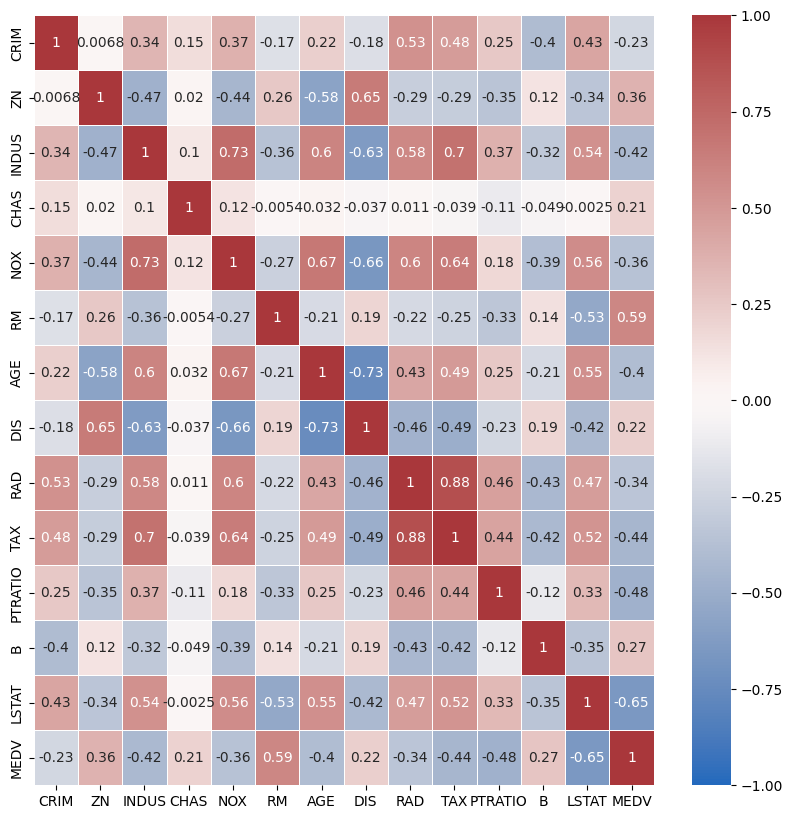

In [22]:
corrmat = dataset_completo.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corrmat, vmax=1,vmin=-1, annot=True, linewidths=.5, ax=ax, cmap='vlag')
plt.show()

In [23]:
X_train_imputado_df.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,428.000000,428.000000,428.000000,428.00000,428.00000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,5.639802,13.028547,11.341130,0.56160,6.27215,67.555942,3.882125,9.918224,416.567973,18.388511,346.942311,13.191342
std,12.713799,24.701353,6.919483,0.11941,0.75806,28.746072,2.196260,8.774316,168.882083,2.224801,99.656005,7.588772
min,0.006320,0.000000,0.460000,0.38500,3.56100,2.900000,1.137000,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082155,0.000000,5.130000,0.45300,5.86575,41.884933,2.077100,4.000000,283.250000,16.800000,367.717500,7.187500
50%,0.339945,0.000000,9.900000,0.53800,6.19300,74.350000,3.361800,5.000000,349.500000,19.000000,390.925000,12.080000
75%,5.476122,20.000000,18.100000,0.64700,6.64375,94.425000,5.287300,24.000000,666.000000,20.200000,395.640000,17.572803
max,88.976200,100.000000,27.740000,0.87100,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


Se puede observar que el rango de valores de cada variable es muy diferentes, entonces es necesario un escalado de los datos

<Axes: >

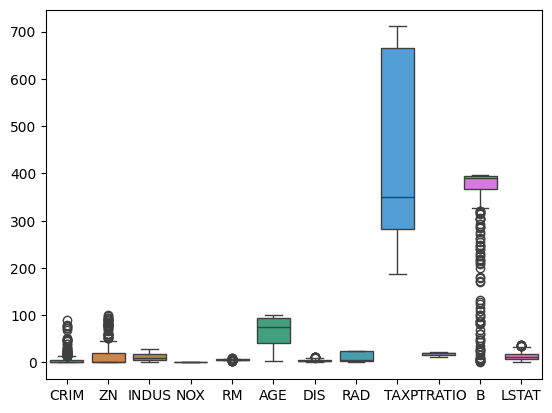

In [24]:
sns.boxplot(X_train_imputado_df)

El boxplot reafirma que es necesario un escalado de los datos

## 4. Implementar la solución del problema de regresión con regresión lineal múltiple.

### Linear Regression

In [26]:
modelo_lr_escalado = make_pipeline(MinMaxScaler(),LinearRegression())
modelo_lr_escalado.fit(X_train_imputado_df,y_train_df)
y_pred_lr_test = modelo_lr_escalado.predict(x_test_imputado)
y_pred_lr_entrenamiento = modelo_lr_escalado.predict(X_train_imputado_df)

rmse_lr_test = mean_squared_error(y_test, y_pred_lr_test, squared = False)
rmse_lr_entrenamiento = mean_squared_error(y_train, y_pred_lr_entrenamiento, squared = False)
print(f"El error (RMSE) de entrenamiento es: {rmse_lr_entrenamiento} y el error (RMSE) de test es: {rmse_lr_test}")

El error (RMSE) de entrenamiento es: 5.496674853290357 y el error (RMSE) de test es: 7.262538408265998


In [24]:
R2_lr_test = metrics.r2_score(y_test, y_pred_lr_test)
R2_lr_entrenamiento = metrics.r2_score(y_train, y_pred_lr_entrenamiento)
print(f"el R2 de entrenamiento es: {R2_lr_entrenamiento} y el R2 de test es: {R2_lr_test}")

el R2 de entrenamiento es: 0.6696724813400821 y el R2 de test es: 0.36583678513620155


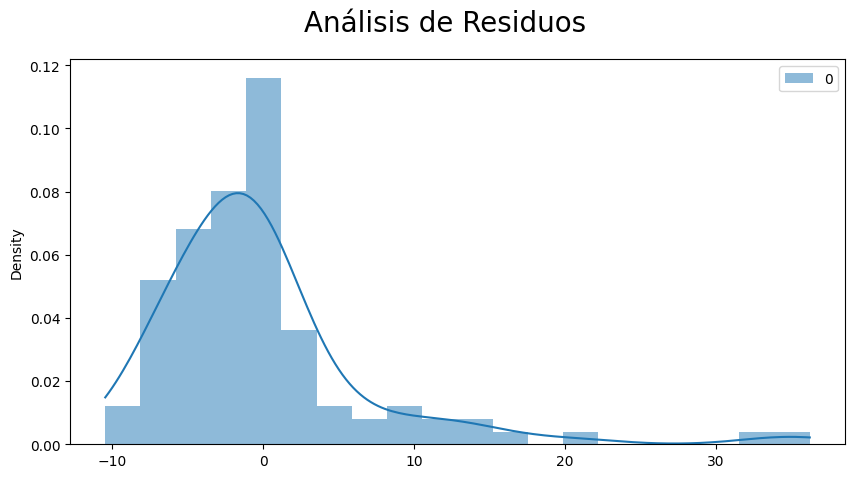

In [27]:
fig = plt.figure(figsize=(10,5))

sns.histplot((y_test - y_pred_lr_test), color="red", kde=True, stat="density", linewidth=0,bins=20)
fig.suptitle('Análisis de Residuos', fontsize = 20)
plt.show()

In [28]:
# Calculamos el R2 en entrenamiento y testeo
R2_lr_train, R2_lr_test = modelo_lr_escalado.score(X_train_imputado_df,y_train_df), modelo_lr_escalado.score(x_test_imputado,y_test)

print(f'El R2 de entrenamiento es: {R2_lr_train:.5f}, y el R2 de test es: {R2_lr_test:.5f}')

El R2 de entrenamiento es: 0.66967, y el R2 de test es: 0.36584


### Gradiente descendiente estocástico

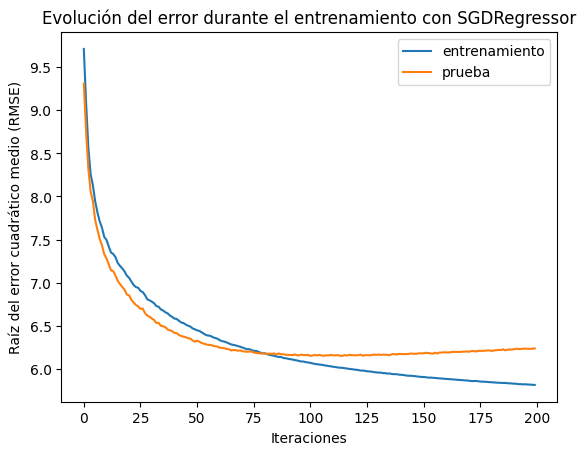

In [29]:
train_errors_sgd = []
test_errors_sgd = []

# Iteramos sobre la cantidad de iteraciones a hacer. Entrenamos el modelo con el dataset de entrenamiento
# Predecimos los valores de entrenamiento y calculamos el error de entrenamiento. Repetimos el procedimiento con el dataset de testeo.
# Ambos errores se guardan en listas y por ultimo graficamos el error en base a la cantidad de iteraciones.
for i in range(1,201):
    modelo_sgd_escalado = make_pipeline(MinMaxScaler(),SGDRegressor(max_iter=i,tol=0.000001))
    modelo_sgd_escalado.fit(X_train_imputado_df,y_train_df)
    gd_y_pred_train = modelo_sgd_escalado.predict(X_train_imputado_df)
    rmse_train_sgd = np.sqrt(mean_squared_error(y_train_df, gd_y_pred_train))
    train_errors_sgd.append(rmse_train_sgd)
    gd_y_pred_test = modelo_sgd_escalado.predict(x_test_imputado)
    rmse_test_sgd = np.sqrt(mean_squared_error(y_test, gd_y_pred_test))
    test_errors_sgd.append(rmse_test_sgd)

plt.plot(train_errors_sgd, label='entrenamiento')
plt.plot(test_errors_sgd, label='prueba')
plt.xlabel('Iteraciones')
plt.ylabel('Raíz del error cuadrático medio (RMSE)')
plt.title('Evolución del error durante el entrenamiento con SGDRegressor')
plt.legend()
plt.show()

Se observa que al pasar de 80 iteraciones aproximadamente el error de prueba comienza a incrementar y el de entrenamiento a disminuir, presentando overfitting. Es obvio aclarar que 80 iteraciones aproximadamente seria el valor de iteraciones ideal para entrenar.

### Lasso

In [36]:
modelo_lasso_escalado = make_pipeline(MinMaxScaler(),Lasso(alpha=0.1553,fit_intercept=True))
modelo_lasso_escalado.fit(X_train_imputado_df,y_train_df)
y_pred_lasso_test = modelo_lasso_escalado.predict(x_test_imputado)
print(f"El R2 de entrenamiento es: {modelo_lasso_escalado.score(X_train_imputado_df,y_train_df)} y el R2 de testeo es: {modelo_lasso_escalado.score(x_test_imputado,y_test)}")

El R2 de entrenamiento es: 0.5847339239312532 y el R2 de testeo es: 0.5266677853004205


In [37]:
y_pred_lasso_entrenamiento = modelo_lasso_escalado.predict(X_train_imputado_df)
rmse_lasso_entrenamiento = np.sqrt(mean_squared_error(y_train_df, y_pred_lasso_entrenamiento))
rmse_lasso_test = np.sqrt(mean_squared_error(y_test,y_pred_lasso_test))
print(f"El RMSE de entrenamiento es: {rmse_lasso_entrenamiento} y el RMSE de testeo es: {rmse_lasso_test}")

El RMSE de entrenamiento es: 6.162981971637571 y el RMSE de testeo es: 6.2743819180102465


### Ridge

In [42]:
modelo_ridge_escalado = make_pipeline(MinMaxScaler(),Ridge(alpha=8.085))
modelo_ridge_escalado.fit(X_train_imputado_df,y_train_df)
y_pred_ridge_test = modelo_ridge_escalado.predict(x_test_imputado)
y_pred_ridge_entrenamiento = modelo_ridge_escalado.predict(X_train_imputado_df)
print(f"El R2 de entrenamiento es: {modelo_ridge_escalado.score(X_train_imputado_df,y_train_df)} y el R2 de testeo es: {modelo_ridge_escalado.score(x_test_imputado,y_test)}")

El R2 de entrenamiento es: 0.6086045427869615 y el R2 de testeo es: 0.49035959980988286


In [43]:
rmse_ridge_entrenamiento = np.sqrt(mean_squared_error(y_train_df, y_pred_ridge_entrenamiento))
rmse_ridge_test = np.sqrt(mean_squared_error(y_test,y_pred_ridge_test))
print(f"El RMSE de entrenamiento es: {rmse_ridge_entrenamiento} y el RMSE de testeo es: {rmse_ridge_test}")

El RMSE de entrenamiento es: 5.983228109426512 y el RMSE de testeo es: 6.510582444467737


### Elastic Net

In [44]:
modelo_enet_escalado = make_pipeline(MinMaxScaler(),ElasticNet(alpha=0.0355,l1_ratio=0.485))
modelo_enet_escalado.fit(X_train_imputado_df,y_train_df)
y_pred_enet_test = modelo_enet_escalado.predict(x_test_imputado)
y_pred_enet_entrenamiento = modelo_enet_escalado.predict(X_train_imputado_df)
print(f"El R2 de entrenamiento es: {modelo_enet_escalado.score(X_train_imputado_df,y_train_df)} y el R2 de testeo es: {modelo_enet_escalado.score(x_test_imputado,y_test)}")

El R2 de entrenamiento es: 0.602618324800704 y el R2 de testeo es: 0.4878995382226945


In [45]:
rmse_enet_entrenamiento = np.sqrt(mean_squared_error(y_train_df, y_pred_enet_entrenamiento))
rmse_enet_test = np.sqrt(mean_squared_error(y_test,y_pred_enet_test))
print(f"El RMSE de entrenamiento es: {rmse_enet_entrenamiento} y el RMSE de testeo es: {rmse_enet_test}")

El RMSE de entrenamiento es: 6.02880987791375 y el RMSE de testeo es: 6.526276993249428


### Conclusiones sobre fitting

Es necesario obtener métricas como R2, MSE o RMSE para ambos conjuntos, ya que se puede dar la ocasión de que las métricas de entrenamiento sean muy buenas, dando idea de overfitting, y las métricas de testeo sean normales. En conclusión observar las métricas de entrenamiento sirven para descartar posibles overfittings.

Creemos que llegamos a un buen punto, pero todo sostenido sobre experimentaciones a ojo. Capaz con las versiones de cross validation de los mismos métodos podrían ser mejores.

## 5. Optimización de hiperparámetros.

### Gradiente descendiente

Observamos y probamos que al variar la tolerancia a mayor es el valor, mayor es el ruido en el error y además no parece converger luego de un número de iteraciones, en donde con menor valor de tolerancia, el error de entrenamiento es mejor que el de testeo.(Esto significa que el modelo entra en un estado de overfitting, pero aún asi el error en general es mejor).

En el caso del número de iteraciones aumenta, observamos y probamos que el error de testeo llega a un punto mínimo y comienza a incrementar, por otro lado el error de entrenamiento decrece hasta un punto de convergencia, en donde es menor que el de testeo. Y en el caso de tener muy pocas iteraciones, el modelo entra en un estado de underfitting, es decir, mucho error en ambos casos.

### Lasso y Ridge

Observamos y probamos que al varíar el alpha de ambos modelos de este dataset, cuando se aumenta el mismo, el R2 disminuye para ambos conjuntos y el MSE se incrementa. Por el contrario al disminuir el mismo, el R2 llega a un punto máximo local y en caso de seguir disminuyendo el valor de alpha empeora el R2, lo mismo con MSE pero de manera inversa, es decir, el MSE disminuye llegando a un punto mínimo local y en caso de seguir disminuyendo el valor de alpha empeora el MSE

## 6. Comparación de modelos.

Según nuestra opinión, el mejor modelo de regresión que observamos fue Lasso, ya que en R2 y MSE superaba a los demás modelos.

Menciones honorificas: SGD(stochastic gradient descent o gradiente descendiente estocástico) ya que tenía valores parecidos a Lasso.

## 7. Conclusión

En conclusión, en este trabajo aprendimos que aunque lo que buscamos no es más que una regresión lineal, esta se puede ver muy afectada por los outliers al momento de modelar la regresión, y esto lleva a tener predicciones erroneas. Entonces observamos que utilizando un escalado de datos, este favorece a la regresión lineal en sentido de que los coeficientes no se van a ver alterados por la escala de cada variable. Además utilizando el gradiente descendiente en cualquiera de sus formas (estocástico, mini-batch y batch) se puede llegar a un mejor o mismo resultado de una manera más eficiente. También podemos utilizar metodos de regularización como Lasso o Ridge para que la sensibilidad a outliers no afecte a la regresión. Todo esto aprovechando las métricas de comparación R2 o RMSE, que nos permiten comparar la efectividad entre diferentes modelos. Estos métodos mayormente estan ligados a la validación cruzada que nos ayuda a encontrar los mejores hiperparametros para cada modelo.